## Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load the Dataset

In [2]:
# Load the dataset
housing = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 3: Explore the Dataset


In [3]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000

## Step 4: Split the Dataset into Training and Test Sets

In [5]:
# Define features and target variable
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(14448, 8) (6192, 8) (14448,) (6192,)


## Step 5: Create and Fit the Model


In [6]:
# Create the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Display the coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: -37.552166316589286
Coefficients: [ 4.41181942e-01  9.70730794e-03 -1.19993946e-01  7.84709051e-01
 -3.39466724e-07 -3.28239095e-03 -4.23679731e-01 -4.39311822e-01]


## Step 6: Make Predictions


In [ ]:
# Make predictions
y_pred = model.predict(X_test)


## Step 7: Visualize the Predictions


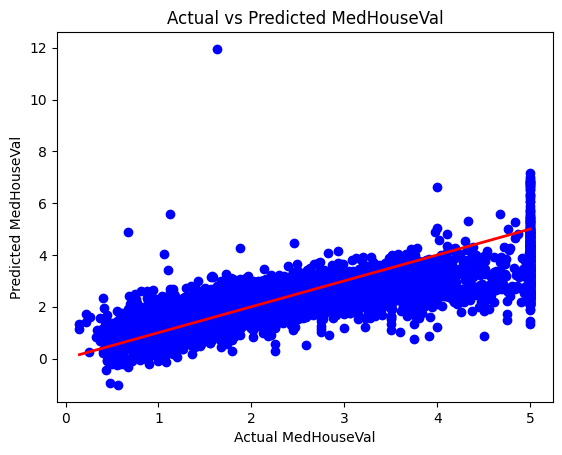

In [8]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Actual vs Predicted MedHouseVal')
plt.show()


## Step 8: Evaluate the Model


In [10]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error:{mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error:0.54
R-squared: 0.60
